In [41]:
#Clear mess in weather.tx
#Convert weather.txt to weather.csv

In [42]:
import re

#Import file
file = open('/home/ayane/AiBD_Lab5/Zad_1/Analysis_Data/weather.txt')
data = file.read()
file.close()

#CLEAR MESS
#Replace 'B*', 'D*' or 'S' with tabulation and 'IO' or 'OS' or 'SI' or 'I+' or 'S+' with tabulation into ,
data = re.sub('[BDS]?[\t ]+(OI|OS|SI|I+|S+)[\t ]*',',',data)
#Replace tabulation with ,
data = re.sub('[\t ]+',',',data)
#Replace a lot of characters with tabulation and enter to just enter (end of line)
data = re.sub('\s*,[\t ]*\n','\n',data)
#Get year-month and variable (TMAX, TMIN or PRCP)
data = re.sub('MX000017004(\d\d\d\d)(\d\d)(\w\w\w\w)','\g<1>-\g<2>,\g<3>',data)
#Delete '-9999' data
data = data.replace('-9999','')

#Create headers
header = 'year-month,var'
for i in range(1,32):
    header += ',D'+str(i)
    
#Connect headers with data
data = header+'\n'+data

#Save *.txt file as *.csv 
file = open('/home/ayane/AiBD_Lab5/Zad_1/Analysis_Data/weather_csv.csv','w')
file.write(data)
file.close()

In [43]:
#END of: Clear mess in weather.tx
#END of: Convert weather.txt to weather.csv

In [44]:
#Converting wide table into high table

In [45]:
import pandas as pd
import math

#Read *.csv file
file = '/home/ayane/AiBD_Lab5/Zad_1/Analysis_Data/weather_csv.csv'
data = pd.read_csv(file)

data_new = {}
counter = 0

for row in data.itertuples():
    for day in range(1,32):
        day_ = row[1]+'-'+str(i).zfill(2) #Year-month-day
        value = row[2+day] #Value in day
        entry = {row[2]: value} #TMAX or TMIN or PRCP is assigned to value (line above)
        if day_ in data_new.keys():
            entry = {**data_new[day_], **entry} #If day is already in data_new => update it
        data_new[day_] = entry #If day isn't in data_new => add it

#Delete any NaN data from data_new
data_new = pd.DataFrame(data_new).T.query('TMAX != "NaN" or TMIN != "NaN" or PRCP != "NaN"')

#Save data as *.csv file (but a tidy one!)
file = open('/home/ayane/AiBD_Lab5/Zad_1/Analysis_Data/weather_csv_tidy.csv', 'w')
file.write('DAY' + data_new.to_csv())
file.close()

In [46]:
#END of: Convert weather.txt to weather.csv

In [47]:
#Data dictionary

In [48]:
import pandas as pd

#Read csv file by pandas
weather = pd.read_csv('/home/ayane/AiBD_Lab5/Zad_1/Analysis_Data/weather_csv_tidy.csv',delimiter=',',decimal=',');

#Show first 5 rows (header + 4 rows)
weather.head()

,DAY,TMAX,TMIN,PRCP
0,1955-05-31,290.0,160.0,46.0
1,1955-07-31,260.0,140.0,6.0
2,1955-08-31,250.0,150.0,64.0
3,1955-10-31,250.0,150.0,0.0
4,1955-12-31,230.0,90.0,0.0


In [49]:
#Show info about csv's data
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 4 columns):
DAY     267 non-null object
TMAX    189 non-null object
TMIN    198 non-null object
PRCP    266 non-null object
dtypes: object(4)
memory usage: 8.5+ KB


In [50]:
weather.describe(include='all') #count, unique, top, freq

,DAY,TMAX,TMIN,PRCP
count,267,189,198,266
unique,267,49,55,60
top,1971-10-31,260.0,160.0,0.0
freq,1,23,33,184


In [51]:
#Statistics - shown and saved
statistics = weather.describe()
statistics.to_csv('/home/ayane/AiBD_Lab5/Zad_1/Analysis_Data/weather_statistics.csv')

print(statistics)

               DAY   TMAX   TMIN PRCP
count          267    189    198  266
unique         267     49     55   60
top     1971-10-31  260.0  160.0  0.0
freq             1     23     33  184


In [52]:
#Dropna ignores Rows/Columns with Null values
#That's why values are smaller than using weather.describe(include='all') commend
weather.dropna().describe()

,DAY,TMAX,TMIN,PRCP
count,185,185,185,185
unique,185,48,50,47
top,1959-08-31,260.0,160.0,0.0
freq,1,23,33,128


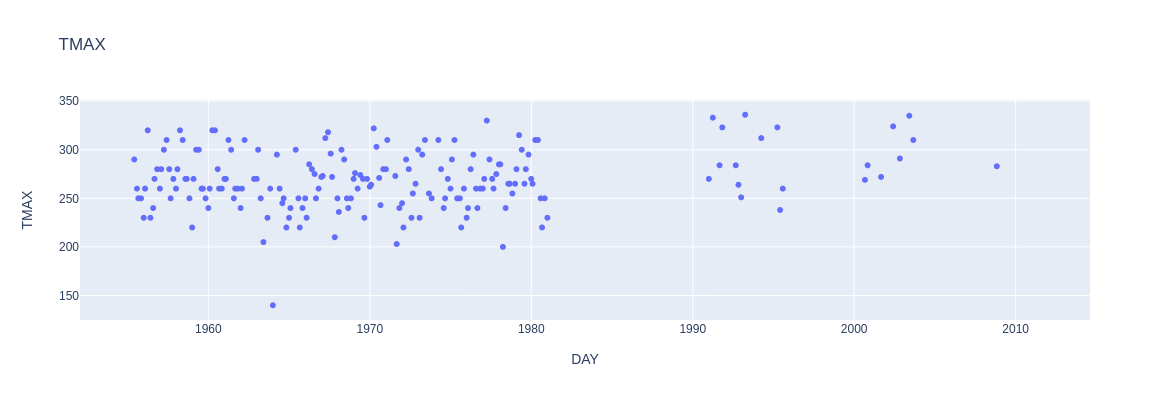

In [53]:
#PLOTLY EXPRESS
import plotly.express as px

#TMAX
fig_weather_Tmax = px.scatter(weather, x="DAY", y="TMAX",height=400, title="TMAX")
fig_weather_Tmax.show()

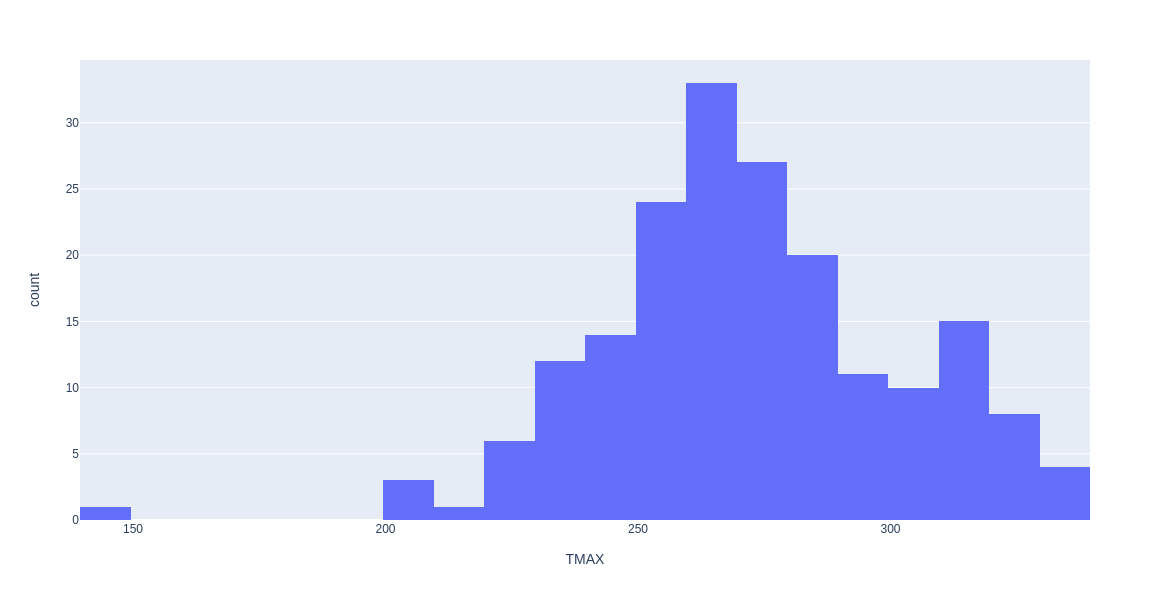

In [54]:
px.histogram(weather, x="TMAX").show()  

In [55]:
print(statistics["TMAX"])

count       189
unique       49
top       260.0
freq         23
Name: TMAX, dtype: object


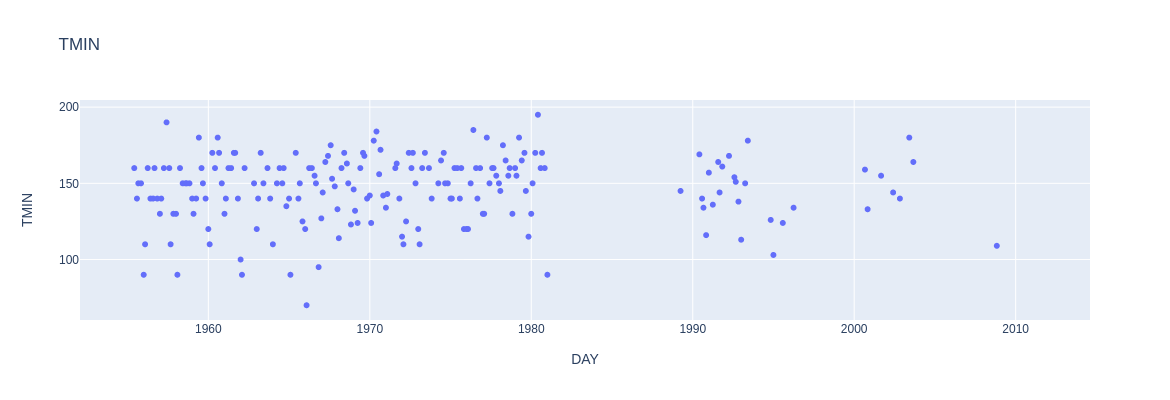

In [56]:
#TMIN
fig_weather_Tmin = px.scatter(weather, x="DAY", y="TMIN",height=400, title="TMIN")
fig_weather_Tmin.show()

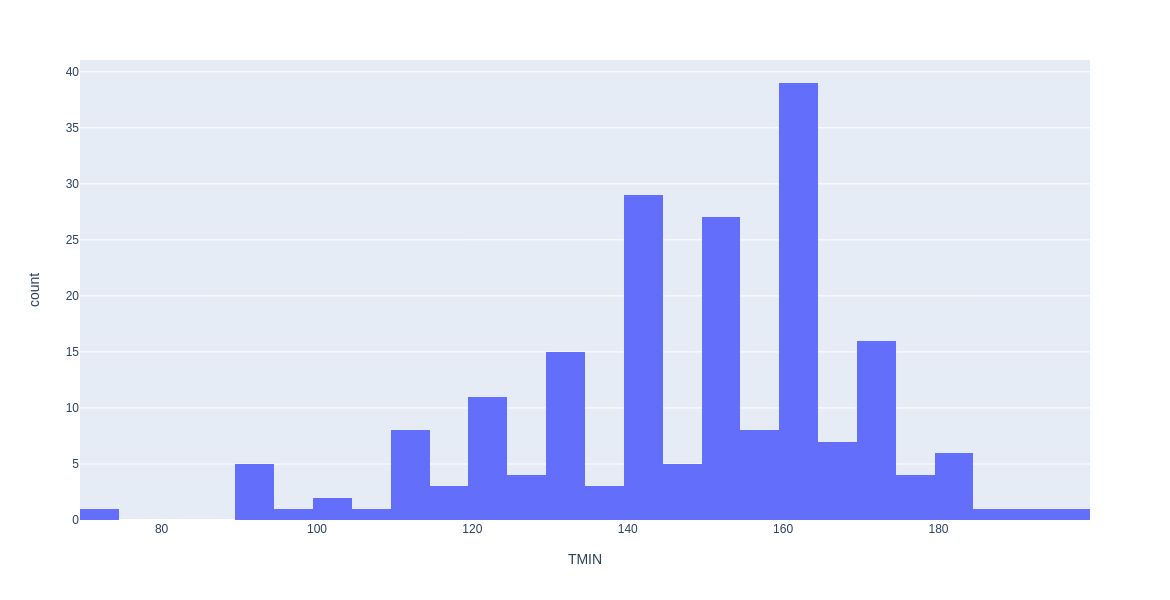

In [57]:
px.histogram(weather, x="TMIN").show()

In [58]:
print(statistics["TMIN"])

count       198
unique       55
top       160.0
freq         33
Name: TMIN, dtype: object


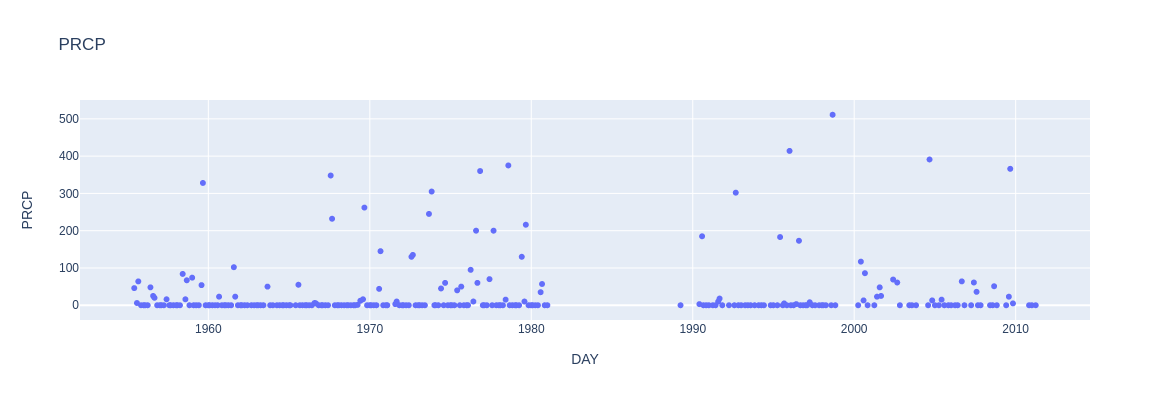

In [59]:
#PRCP
fig_weather_PRCP = px.scatter(weather, x="DAY", y="PRCP",height=400, title="PRCP")
fig_weather_PRCP.show()

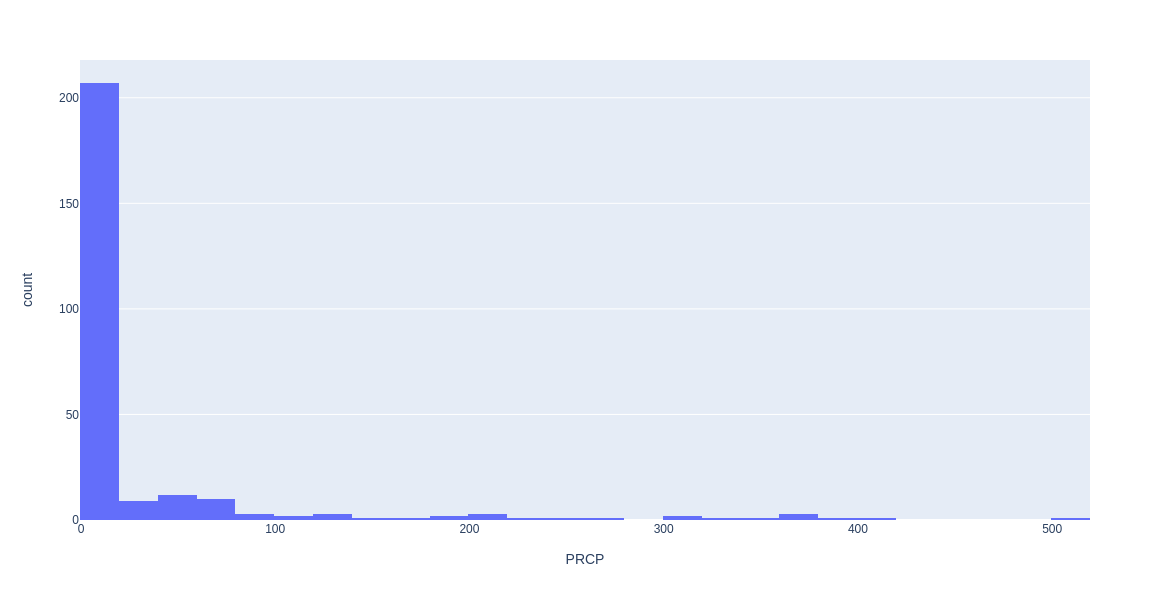

In [60]:
px.histogram(weather, x="PRCP").show()  

In [61]:
print(statistics["PRCP"])

count     266
unique     60
top       0.0
freq      184
Name: PRCP, dtype: object


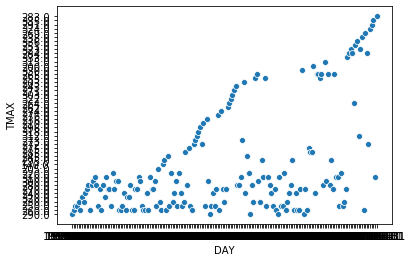

In [62]:
#SEABORN
import seaborn as sns

#TMAX
ax = sns.scatterplot(x="DAY", y="TMAX",data=weather)

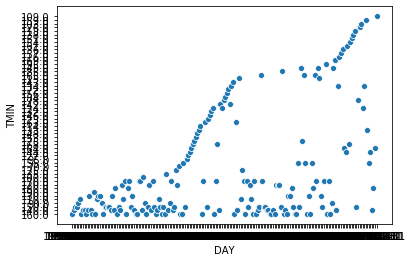

In [63]:
#TMIN
ax = sns.scatterplot(x="DAY", y="TMIN",data=weather)

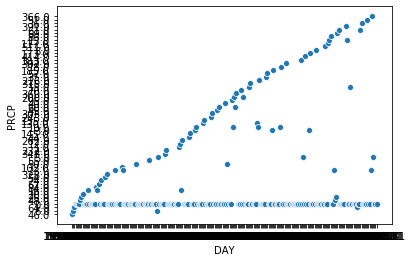

In [64]:
#PRCP
ax = sns.scatterplot(x="DAY", y="PRCP",data=weather)

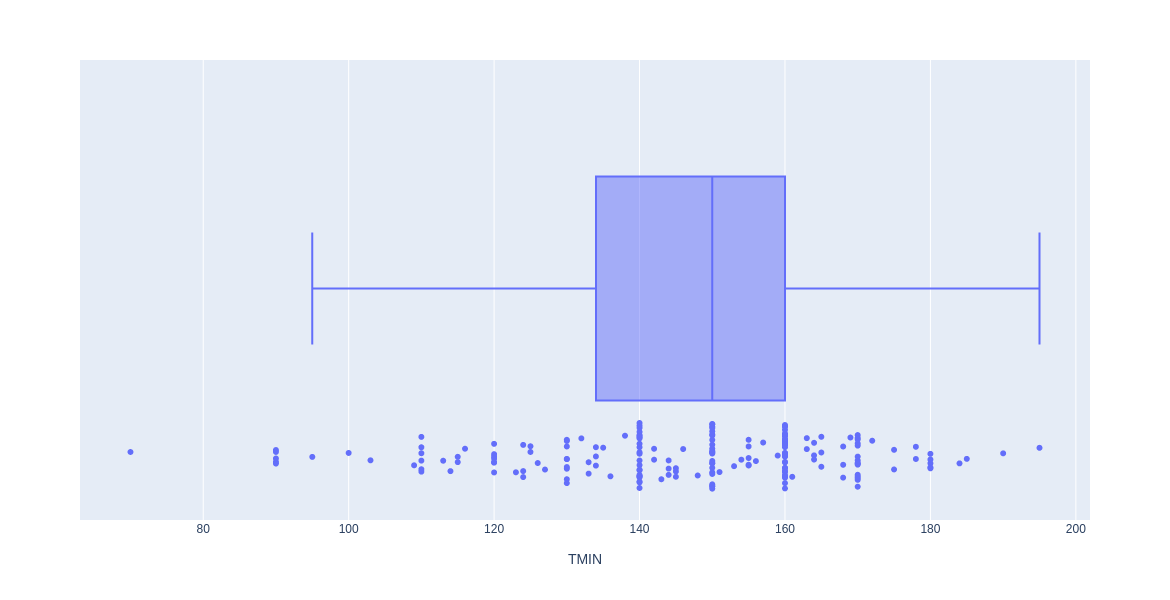

In [65]:
#BOX PLOT
#TMIN
fig_weather_box=px.box(weather, x="TMIN", points='all', orientation='h')
fig_weather_box.show()

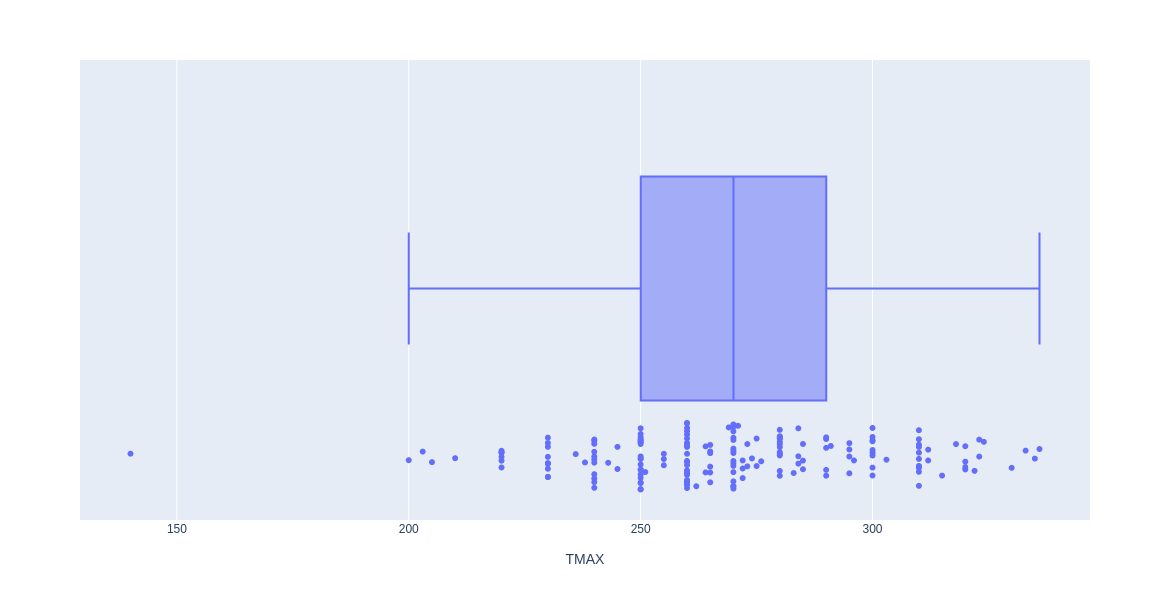

In [66]:
#TMAX
fig_weather_box=px.box(weather, x="TMAX", points='all', orientation='h')
fig_weather_box.show()

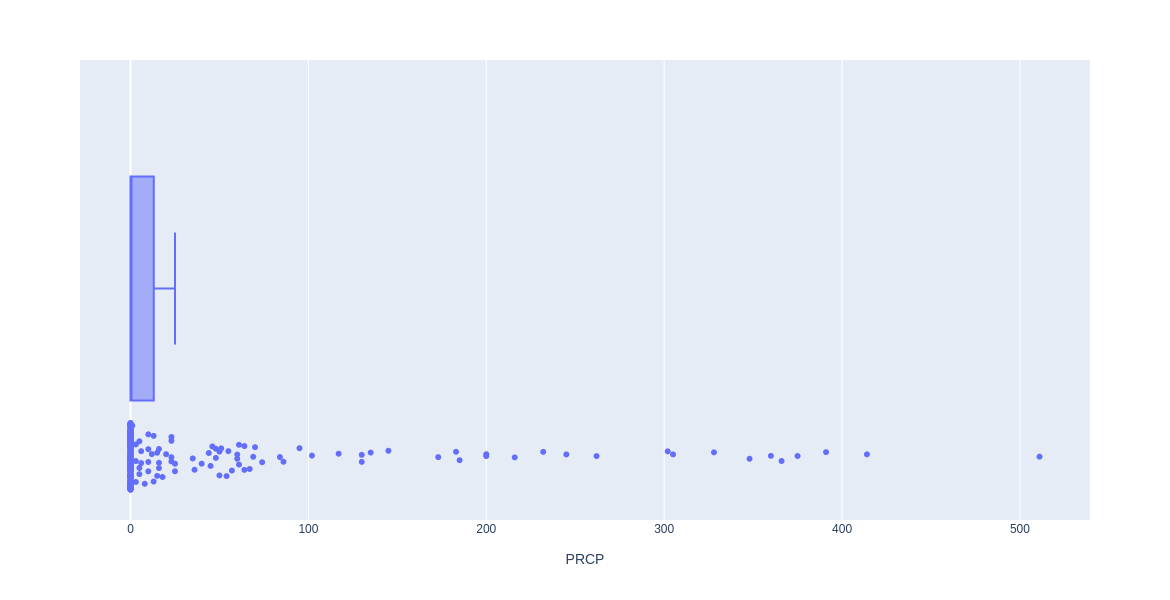

In [67]:
#PRCP
fig_weather_box=px.box(weather, x="PRCP", points='all', orientation='h')
fig_weather_box.show()

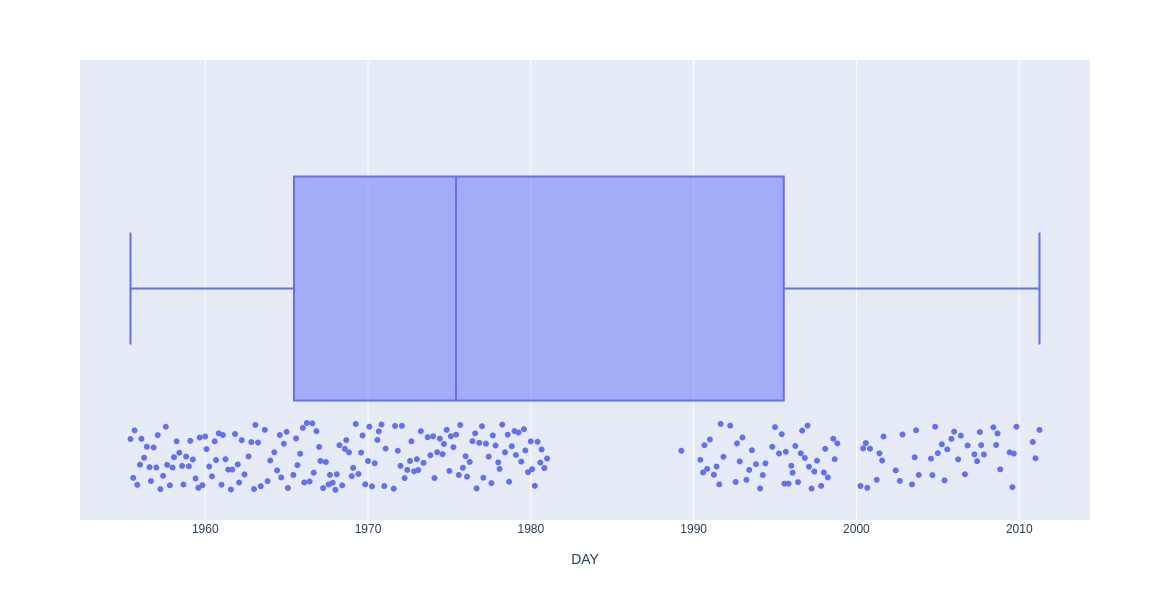

In [68]:
#DAY
fig_weather_box=px.box(weather, x="DAY", points='all', orientation='h')
fig_weather_box.show()

#END of: Data dictionary